In [41]:
from ipywidgets import widgets,interact,interact_manual
from IPython.display import display, clear_output, Markdown, HTML
import Start_Process
import numpy as np
import pandas as pd
from imutils import build_montages
from Utils import Data_Searches as ds

<h1>Escreva o nome do caso</h1>

In [19]:
nome_do_caso = "caso_1"

<h2>Gerar dados</h2>

In [20]:
df = Start_Process.comecar_processamento(nome_do_caso)

user/dataset/input_data/caso_1
Process Number 0 was startedProcess Number 1 was started

[INFO] processing user/dataset/input_data/caso_1/0.jpg , 1/3[INFO] processing user/dataset/input_data/caso_1/3.jpg , 1/3

[INFO] processing user/dataset/input_data/caso_1/c_1.jpg , 2/3
[INFO] processing user/dataset/input_data/caso_1/1.jpg , 2/3
[INFO] processing user/dataset/input_data/caso_1/c_2.jpg , 3/3
[INFO] processing user/dataset/input_data/caso_1/2.jpg , 3/3
Process Number 1 has ended
Process Number 0 has ended
extraction: 26.945114612579346


In [22]:
if len(df) != 0:
    conection_df = Start_Process.generate_cluster_connections(df)
else:
    print("Escreva o nome do caso corretamente")

<h1>Fazer buscas</h1>

In [23]:
def create_menu(data : list):
    return widgets.Dropdown(
       options=data,
       value=data[0],
       description='Cluster:')


<h2>Selecionar cluster</h2>

In [24]:
selected_cluster = 0
selected_cluster = create_menu(np.unique(df["cluster"].values).tolist())
print("escolha o cluster para ser mostrado as faces")
widgets.VBox([selected_cluster])

escolha o cluster para ser mostrado as faces


<h2>Mostrar exemplos de Imagens do cluster selecionado</h2>

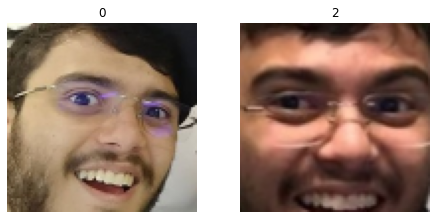

In [25]:
ds.show_cluster_random_faces(df, selected_cluster.value)

<h2>Mostrar Conexões do cluster selecionado</h2>

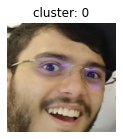

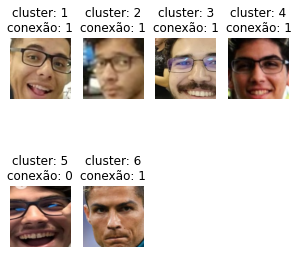

In [26]:
ds.show_cluster_connections(selected_cluster.value, nome_do_caso, conection_df)